The image saved on mac: /Users/rona/Desktop/amplitude_damping.png


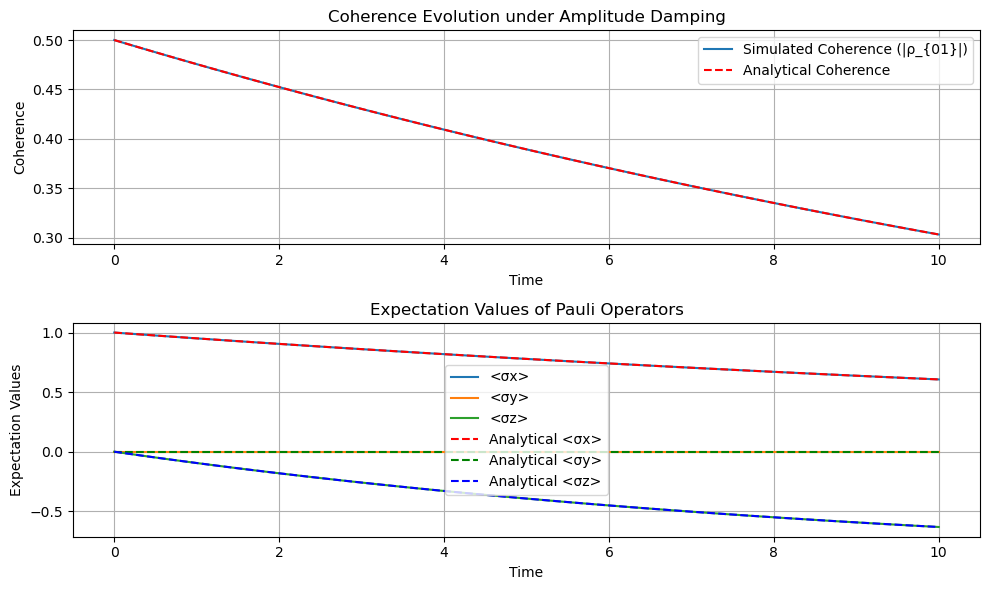

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
import os

# Simulation parameters
N = 2  # Hilbert space dimension for a single qubit
tlist = np.linspace(0, 10, 100)  # Time points for simulation
gamma = 0.1  # Amplitude damping rate

# Initialize qubit in superposition state using Hadamard gate
psi0 = (basis(2, 0) + basis(2, 1)).unit()  # Superposition state |+> = (|0> + |1>)/sqrt(2)
rho0 = ket2dm(psi0)  # Initial density matrix

# Define Pauli operators
sx = sigmax()  # Pauli X operator
sy = sigmay()  # Pauli Y operator
sz = sigmaz()  # Pauli Z operator

# Define collapse operator for amplitude damping
c_ops = [np.sqrt(gamma) * sigmam()]  # Collapse operator for amplitude damping

# Hamiltonian (no coherent evolution, only decoherence)
H = 0 * sz  # Trivial Hamiltonian (no unitary dynamics)

# Solve the Lindblad master equation with explicit e_ops and options
result = mesolve(H, rho0, tlist, c_ops=c_ops, e_ops=[sx, sy, sz], options={"store_states": True})

# Calculate coherence and manual expectation values
coherence = [np.abs(result.states[i][0, 1]) for i in range(len(tlist))]
ex_sx_manual = [expect(sx, state) for state in result.states]
ex_sy_manual = [expect(sy, state) for state in result.states]
ex_sz_manual = [expect(sz, state) for state in result.states]

# Analytical solutions for validation
analytical_coherence = 0.5 * np.exp(-gamma * tlist / 2)
analytical_sx = np.exp(-gamma * tlist / 2)
analytical_sy = np.zeros_like(tlist)
analytical_sz = np.exp(-gamma * tlist) - 1

# Plotting results
plt.figure(figsize=(10, 6))

# Plot coherence with analytical solution
plt.subplot(2, 1, 1)
plt.plot(tlist, coherence, label='Simulated Coherence (|ρ_{01}|)')
plt.plot(tlist, analytical_coherence, 'r--', label='Analytical Coherence')
plt.xlabel('Time')
plt.ylabel('Coherence')
plt.title('Coherence Evolution under Amplitude Damping')
plt.legend()
plt.grid()

# Plot expectation values with analytical solutions
plt.subplot(2, 1, 2)
plt.plot(tlist, ex_sx_manual, label='<σx>')
plt.plot(tlist, ex_sy_manual, label='<σy>')
plt.plot(tlist, ex_sz_manual, label='<σz>')
plt.plot(tlist, analytical_sx, 'r--', label='Analytical <σx>')
plt.plot(tlist, analytical_sy, 'g--', label='Analytical <σy>')
plt.plot(tlist, analytical_sz, 'b--', label='Analytical <σz>')
plt.xlabel('Time')
plt.ylabel('Expectation Values')
plt.title('Expectation Values of Pauli Operators')
plt.legend()
plt.grid()

plt.tight_layout()


desktop_path = "/Users/rona/Desktop/amplitude_damping.png"
plt.savefig(desktop_path, dpi=300)

print(f"The image saved on mac: {desktop_path}")

plt.show()
